# Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Functions

In [2]:
def step_func(t, D_start, D_stop):
    if t > D_start and t < D_stop:
        return 1
    else:
        return 0

def hill(y, beta, K, n):
    return 1 + beta * y ** n / (K ** n + y ** n)

def act_hill(y, K, n):
    return y ** n / (K ** n + y ** n)

def PAR_rate(y, alfa, beta_y1, beta_y2, x, K, n):
    return beta_y1 * act_hill(x, K, n) + beta_y2 * act_hill(y, K, n) - alfa * y + 1

def PAR_model(u, t, alfa, beta_x, beta_y1, beta_y2, K, D_start, D_stop, n):
    x,y = u
    
    beta_x = beta_x * step_func(t, D_start, D_stop)
    
    dxdt = beta_x - alfa * x
    dydt = PAR_rate(y, alfa, beta_y1, beta_y2, x, K, n)
    return dxdt, dydt



# Conditions

In [3]:
t = np.linspace(0,20)
n = 10
alfa = 1
beta_x = 5
beta_y1 = 3
beta_y2 = 4
K = 2.5
u0 = [0,1]
D_start = 1
D_stop = 9
u0[0] = 0

# Plot of rates in PAR

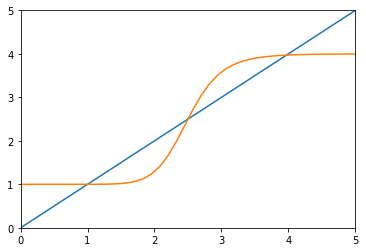

In [4]:
x_hill = np.linspace(0,6)
y_hill = list(map(lambda x: hill(x, beta_y1, K, n), x_hill))

x_line = np.linspace(0,6)
y_line = np.linspace(0,6)



plt.ylim(0,5)
plt.xlim(0,5)
plt.plot(x_line, y_line)
plt.plot(x_hill, y_hill)



# Plot of PAR starting at differnet levels of expression

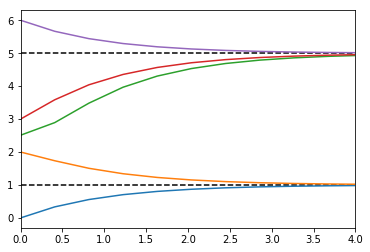

In [5]:
u0_1 = [0,0]
u0_2 = [0,2]
u0_3 = [0,2.51]
u0_4 = [0, 3]
u0_5 = [0, 6]


u1 = odeint(PAR_model, u0_1, t, (alfa, 0, beta_y1, beta_y2, K, D_start, D_stop, n))
u2 = odeint(PAR_model, u0_2, t, (alfa, 0, beta_y1, beta_y2, K, D_start, D_stop, n))
u3 = odeint(PAR_model, u0_3, t, (alfa, 0, beta_y1, beta_y2, K, D_start, D_stop, n))
u4 = odeint(PAR_model, u0_4, t, (alfa, 0, beta_y1, beta_y2, K, D_start, D_stop, n))
u5 = odeint(PAR_model, u0_5, t, (alfa, 0, beta_y1, beta_y2, K, D_start, D_stop, n))

plt.xlim(0,4)
plt.axhline(5, color = 'k', linestyle = '--')
plt.axhline(1, color = 'k', linestyle = '--')
plt.plot(t, u1[:,1])
plt.plot(t, u2[:,1])
plt.plot(t, u3[:,1])
plt.plot(t, u4[:,1])
plt.plot(t, u5[:,1])

# Solving and plots

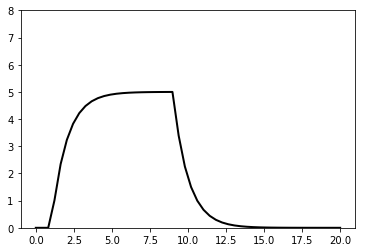

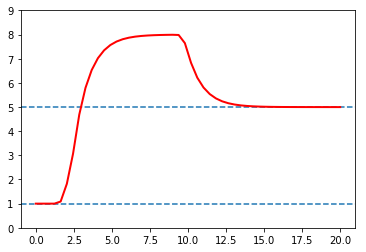

In [6]:
u = odeint(PAR_model, u0, t, (alfa, beta_x, beta_y1, beta_y2, K, D_start, D_stop, n))

x = u[:,0]
y = u[:,1]

plt.plot(t, x, 'k-', linewidth=2, label='x')
plt.ylim(0,8)
plt.show()

plt.axhline(1, linestyle='--')
plt.axhline((beta_y2 + 1) / alfa, linestyle='--')
plt.plot(t, y, 'r-', linewidth=2, label='y')
plt.ylim(0,9)
plt.show()

# Functions for toggle switch

In [7]:
def rep_hill(x, K = 2.5, n = 5, beta = 5):
    return beta * K ** n / (K ** n + x ** n)


def toggle_switch_model(u, t, alfa, beta_x, beta_y, K, n):
    x,y = u
    
    dxdt = rep_hill(y, K, n, beta_x) - alfa * x
    dydt = rep_hill(x, K, n, beta_y) - alfa * y
    return dxdt, dydt


# Conditions for toggle switch

In [8]:
start, stop = (0,6)
t = np.linspace(start,stop)
n = 5
alfa = 1
beta_x = 5
beta_y = 5
K = 2.5
u0_1 = [4.5,4]
u0_2 = [4,4.5]
u0_3 = [1, 0.5]
u0_4 = [0.5, 1]

# Solving and plotting toggle switch

Text(0, 0.5, 'Y')

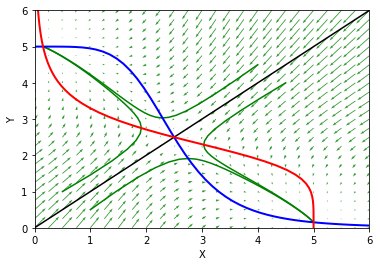

In [9]:
# Solving for different starting points
u_1 = odeint(toggle_switch_model, u0_1, t, (alfa, beta_x, beta_y, K, n))
u_2 = odeint(toggle_switch_model, u0_2, t, (alfa, beta_x, beta_y, K, n))
u_3 = odeint(toggle_switch_model, u0_3, t, (alfa, beta_x, beta_y, K, n))
u_4 = odeint(toggle_switch_model, u0_4, t, (alfa, beta_x, beta_y, K, n))


# Hill function values
X_x_axis_hill = list(np.linspace(start,stop))
X_y_axis_hill = list(map(rep_hill, X_x_axis_hill))

Y_y_axis_hill = list(np.linspace(start,stop))
Y_x_axis_hill = list(map(rep_hill, Y_y_axis_hill))

# NEED STEADY STATES


# Line that separates states
mid_line_x = list(np.linspace(start,stop))
mid_line_y = list(np.linspace(start,stop))

# Gradients and their coordinates
x_coords = np.linspace(start, stop, num = 25)
y_coords = np.linspace(start, stop, num = 25)

x_gradients = np.array([[rep_hill(y) - alfa * x for x in x_coords] for y in y_coords])
y_gradients = np.array([[rep_hill(x) - alfa * y for x in x_coords] for y in y_coords])

# Plotting
plt.quiver(x_coords, y_coords, x_gradients, y_gradients, alpha = 0.8, color='g')
plt.plot(mid_line_x, mid_line_y, 'k')
plt.xlim(start, stop)
plt.ylim(start, stop)
plt.plot(u_1[:,0], u_1[:,1], 'g-')
plt.plot(u_2[:,0], u_2[:,1], 'g-')
plt.plot(u_3[:,0], u_3[:,1], 'g-')
plt.plot(u_4[:,0], u_4[:,1], 'g-')
plt.plot(X_x_axis_hill, X_y_axis_hill, 'b-', linewidth=2, label='x')
plt.plot(Y_x_axis_hill, Y_y_axis_hill, 'r-', linewidth=2, label='y')
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
n = 1

# Solving for different starting points
u_1 = odeint(toggle_switch_model, u0_1, t, (alfa, beta_x, beta_y, K, n))
u_2 = odeint(toggle_switch_model, u0_2, t, (alfa, beta_x, beta_y, K, n))
u_3 = odeint(toggle_switch_model, u0_3, t, (alfa, beta_x, beta_y, K, n))
u_4 = odeint(toggle_switch_model, u0_4, t, (alfa, beta_x, beta_y, K, n))


# Hill function values
X_x_axis_hill = list(np.linspace(start,stop))
X_y_axis_hill = list(map(lambda x: rep_hill(x, n=1), X_x_axis_hill))

Y_y_axis_hill = list(np.linspace(start,stop))
Y_x_axis_hill = list(map(lambda x: rep_hill(x, n=1), Y_y_axis_hill))

# NEED STEADY STATES


# Line that separates states
mid_line_x = list(np.linspace(start,stop))
mid_line_y = list(np.linspace(start,stop))

# Gradients and their coordinates
x_coords = np.linspace(start, stop, num = 25)
y_coords = np.linspace(start, stop, num = 25)

x_gradients = np.array([[rep_hill(y,n=1) - alfa * x for x in x_coords] for y in y_coords])
y_gradients = np.array([[rep_hill(x,n=1) - alfa * y for x in x_coords] for y in y_coords])

# Plotting
plt.quiver(x_coords, y_coords, x_gradients, y_gradients, alpha = 0.8, color='g')
plt.plot(mid_line_x, mid_line_y, 'k')
plt.xlim(start, stop)
plt.ylim(start, stop)
plt.plot(u_1[:,0], u_1[:,1], 'g-')
plt.plot(u_2[:,0], u_2[:,1], 'g-')
plt.plot(u_3[:,0], u_3[:,1], 'g-')
plt.plot(u_4[:,0], u_4[:,1], 'g-')
plt.plot(X_x_axis_hill, X_y_axis_hill, 'b-', linewidth=2, label='x')
plt.plot(Y_x_axis_hill, Y_y_axis_hill, 'r-', linewidth=2, label='y')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

# Switch pulse Z

In [11]:
def step_func(t, D_start, D_stop):
    if t > D_start and t < D_stop:
        return 1
    else:
        return 0
    
        
def act_hill(x, K, n):
    return x ** n / (K ** n + x ** n)

def rep_hill(x, K, n):
    return K ** n / (K ** n + x ** n)

def PAR_x(x, y, z, alfa, beta, K, n):
    return beta * rep_hill(y, K, n) * act_hill(x, K, n) * rep_hill(z, K, n) - alfa * x + 1

def PAR_y(x, y, z, alfa, beta, K, n):
    return beta * rep_hill(x, K, n) * act_hill(y, K, n) + beta * act_hill(z, K, n) - alfa * y + 1

def switch_with_z(u, t, alfa, beta, K, n, D_start, D_stop):
    x,y,z = u
    
    dzdt = beta * step_func(t, D_start, D_stop) - alfa * z
    dxdt = PAR_x(x, y, z, alfa, beta, K, n)
    dydt = PAR_y(x, y, z, alfa, beta, K, n)
    
    return dxdt, dydt, dzdt

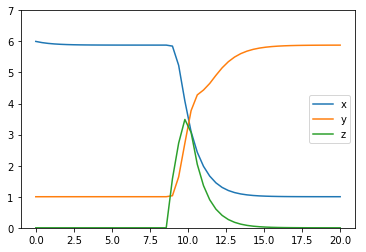

In [12]:
start, stop = (0,20)
t = np.linspace(start,stop)
n = 5
alfa = 1
beta = 5
K = 2.5
u0 = [6, 1, 0]
D_start = 8.6
D_stop  = 10

u = odeint(switch_with_z, u0, t, (alfa, beta, K, n, D_start, D_stop))


plt.plot(t, u[:,0], label = 'x')
plt.plot(t, u[:,1], label = 'y')
plt.plot(t, u[:,2], label = 'z')
plt.ylim(0,7)
plt.legend()
plt.show()
